<a href="https://colab.research.google.com/github/nohjuhyeon/study_data_analytics/blob/main/docs/quests/EDAs/preprocessing_titanic_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
df_titanic = pd.read_csv('/content/TitanicFromDisaster_train.csv')
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
import seaborn as sns
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 1. 'Age' 열에서 결측치를 평균 나이로 채우기.

In [3]:
df_titanic_describe = df_titanic.describe()
Age_average = df_titanic_describe.loc['mean']["Age"]
df_titanic_first = df_titanic.copy()
Age_average

29.69911764705882

In [4]:
df_titanic_first['Age'].fillna(Age_average,inplace=True)
df_titanic_first

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


### 2. Cabin' 열에 결측치가 있는 행을 찾고, 해당 행들의 평균 'Fare' 계산하기.


In [5]:
df_titanic_second = df_titanic.copy()
df_titanic_second['Cabin'].fillna('NaN',inplace=True)
condition_second = 'Cabin == "NaN"'
Fare_average = df_titanic_second.query(condition_second).describe().loc["mean"]["Fare"]
Fare_average

19.157325327510915

### 3. 'Embarked' 열에서 결측치가 있는 행을 찾고, 가장 많이 등장하는 항구로 채우기.

In [6]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic_third = df_titanic.copy()
top_embarked = df_titanic_third.describe(include = 'object').loc['top']['Embarked']
df_titanic_third['Embarked'].fillna(top_embarked,inplace=True)
df_titanic_third.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 4. 'Fare' 열에서 평균보다 3 표준편차(mean + 3 * std) 이상 높은 이상치를 가진 행들을 찾기.


<Axes: xlabel='Fare'>

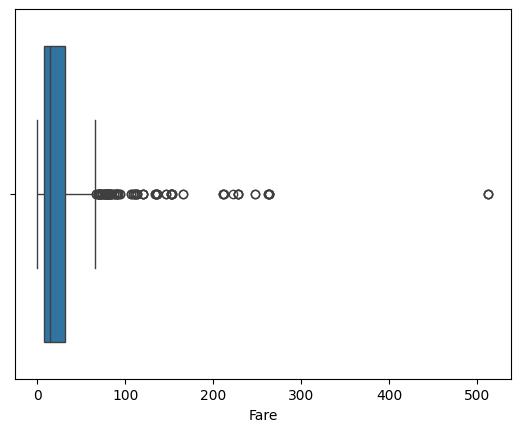

In [8]:
df_titanic_forth = df_titanic.copy()
sns.boxplot(data=df_titanic_forth,x='Fare')

In [9]:
standard = df_titanic_forth.describe().loc['mean']['Fare'] + df_titanic_forth.describe().loc['std']['Fare']*3
condition_forth = f"Fare >= {standard}"
df_titanic_forth.query(condition_forth).sort_values(by='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
779,780,1,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B3,S
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
689,690,1,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B5,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
557,558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C


### 5. 'SibSp' (형제 자매/배우자 수)가 5 이상인 이상치를 가진 행들을 찾기.

<Axes: xlabel='SibSp'>

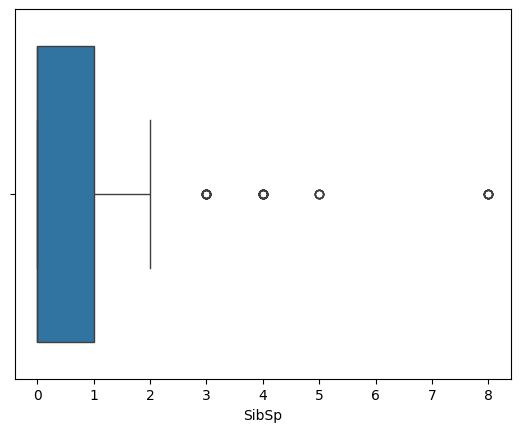

In [10]:
df_titanic_fifth = df_titanic.copy()
sns.boxplot(data=df_titanic_fifth,x='SibSp')

In [11]:
condition_fifth = "SibSp >= 5"
df_titanic_fifth.query(condition_fifth).sort_values(by='SibSp')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.90,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.90,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.90,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.90,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S


### 6. 'Parch' (부모/자녀 수) 열에서 0이 아닌 값을 가진 행들의 평균 'Age' 계산하기.


In [12]:
df_titanic_sixth = df_titanic.copy()
condition_sixth = "Parch != 0"
Parch_Age_average = df_titanic_sixth.query(condition_sixth).describe().loc['mean']['Age']
Parch_Age_average

23.006062176165802

### 7. 'Fare'가 0인 행들을 찾고, 이를 평균 'Fare'로 채우기.

In [13]:
df_titanic_seventh = df_titanic.copy()
condition_seventh = "Fare == 0"
Fare_average_seventh = df_titanic_seventh.describe().loc['mean']['Fare']
df_titanic_seventh.loc[df_titanic_seventh['Fare']==0,'Fare'] = Fare_average_seventh
df_titanic_seventh.sort_values(by="Fare")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


### 8. 'Pclass' (티켓 등급)가 1등급인 승객들 중 'Cabin' 열의 결측치 비율 계산하기.

In [47]:
df_titanic_eighth = df_titanic.copy()
condition_eighth = "Pclass == 1"
sum_Pclass = df_titanic_eighth['Pclass'].value_counts().loc[1]
non_sum_Cabin = df_titanic_eighth.query(condition_eighth).isnull().sum()['Cabin']
percent_nun_Cabin = (non_sum_Cabin/sum_Pclass)*100
percent_nun_Cabin

18.51851851851852

### 9. 'Age'에는 결측치가 있고, 'Fare'은 0인 행들을 찾기.

In [15]:
df_titanic_ninth = df_titanic.copy()
df_titanic_ninth['Age'].fillna('NaN',inplace=True)
condition_Age_ninth = 'Age =="NaN"'
condition_Fare_ninth = "Fare == 0"
conditions_ninth = f"{condition_Age_ninth} and {condition_Fare_ninth}"
df_titanic_ninth.query(conditions_ninth)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S
674,675,0,2,"Watson, Mr. Ennis Hastings",male,NaN,0,0,239856,0.0,NaN,S
732,733,0,2,"Knight, Mr. Robert J",male,NaN,0,0,239855,0.0,NaN,S
815,816,0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S


### 10. 'Sex' 열에서 값이 'male' 또는 'female'이 아닌 이상치를 가진 행들을 찾기.

<Axes: xlabel='Sex'>

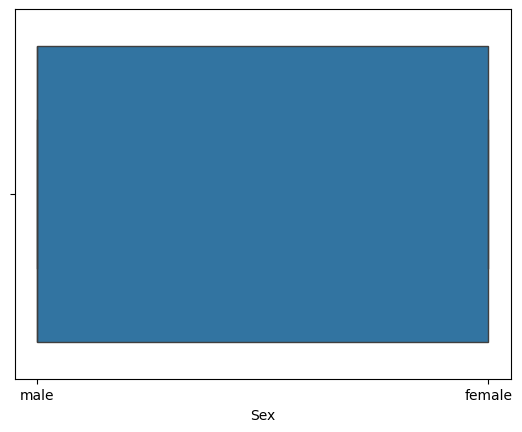

In [16]:
df_titanic_tenth = df_titanic.copy()
sns.boxplot(data=df_titanic_tenth,x='Sex')
### answer : 0

### 11. Fare' 열의 결측치(값이 0)를 해당 'Pclass'의 평균 요금으로 채우기.

In [17]:
df_titanic_eleventh = df_titanic.copy()
condition_eleventh = "Fare == 0"
Pclass_average_eleventh = pd.pivot_table(data=df_titanic_eleventh[['Fare','Pclass']],index=['Pclass'],values=['Fare'],aggfunc=np.mean)
df_titanic_eleventh.loc[(df_titanic_eleventh['Fare'] == 0) & (df_titanic_eleventh['Pclass'] == 1), 'Fare'] = Pclass_average_eleventh.loc[1]['Fare']
df_titanic_eleventh.loc[(df_titanic_eleventh['Fare'] == 0) & (df_titanic_eleventh['Pclass'] == 2), 'Fare'] = Pclass_average_eleventh.loc[2]['Fare']
df_titanic_eleventh.loc[(df_titanic_eleventh['Fare'] == 0) & (df_titanic_eleventh['Pclass'] == 3), 'Fare'] = Pclass_average_eleventh.loc[3]['Fare']
df_titanic_eleventh.sort_values(by='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
818,819,0,3,"Holm, Mr. John Fredrik Alexander",male,43.0,0,0,C 7075,6.4500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C


### 12. 'Age' 열에서 18세 미만인 승객들 중 'SibSp'가 2 이상인 경우를 찾기.


In [18]:
df_titanic_twelfth = df_titanic.copy()
condition_twelfth_Age = 'Age < 18'
condition_twelfth_SibSp = 'SibSp >= 2'
conditions_twelfth = f"{condition_twelfth_Age} and {condition_twelfth_SibSp}"
df_titanic_twelfth.query(conditions_twelfth).sort_values(by='SibSp')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
333,334,0,3,"Vander Planke, Mr. Leo Edmondus",male,16.00,2,0,345764,18.0000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
618,619,1,2,"Becker, Miss. Marion Louise",female,4.00,2,1,230136,39.0000,F4,S
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
448,449,1,3,"Baclini, Miss. Marie Catherine",female,5.00,2,1,2666,19.2583,NaN,C
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.00,2,2,W./C. 6608,34.3750,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.0000,F4,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.00,3,2,347088,27.9000,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.00,3,2,347088,27.9000,NaN,S


### 13. 'Embarked' 열에서 가장 적게 등장하는 항구를 기준으로 결측치 채우기.


In [19]:
df_titanic_thirteenth = df_titanic.copy()
Embarked_few = df_titanic_thirteenth['Embarked'].value_counts().index.to_list()[-1]
df_titanic_thirteenth['Embarked'].fillna(Embarked_few,inplace=True)
df_titanic_thirteenth['Embarked'].isnull().sum()

0

### 14. Cabin' 열이 결측치인 승객들 중 'Survived'가 1인 비율 계산하기.

In [20]:
df_titanic_fourteenth = df_titanic.copy()
Cabin_nun_fourteenth = df_titanic_fourteenth['Cabin'].isnull().sum()
df_titanic_fourteenth['Cabin'].fillna('NaN',inplace=True)
condition_fourteenth_Cabin = 'Cabin == "NaN"'
Survived_one_fourteenth = df_titanic_fourteenth.query(condition_fourteenth_Cabin)['Survived'].value_counts().loc[1]
percent_survived = (Survived_one_fourteenth/Cabin_nun_fourteenth)*100
percent_survived

29.985443959243085

### 15. 'Age' 열에서 65세 이상인 승객들의 평균 'Fare' 계산하기.

In [21]:
df_titanic_fifteenth = df_titanic.copy()
condition_fifteenth_age = "Age >= 65"
Average_Fare_fifteenth = df_titanic_fifteenth.query(condition_fifteenth_age).describe().loc['mean']['Fare']
Average_Fare_fifteenth

28.905690909090904

### 16. Ticket' 열에서 중복되는 값이 있는 행들을 찾고, 이들의 평균 'Age' 계산하기.


In [22]:
df_titanic_sixteenth = df_titanic.copy()
Ticket_index_list = df_titanic_sixteenth['Ticket'].value_counts().loc[df_titanic_sixteenth['Ticket'].value_counts() > 1].index.to_list()
df_titanic_sixteenth['Ticket'].value_counts().loc[df_titanic_sixteenth['Ticket'].value_counts() > 1].sum()



344

In [23]:
condition_Ticket_sixteenth = f"Ticket in {Ticket_index_list}"
Age_average_sixteenth = df_titanic_sixteenth.query(condition_Ticket_sixteenth).describe().loc['mean']['Age']
Age_average_sixteenth

26.561864406779662

### 17. 'Fare' 열에서 100달러 이상을 지불한 승객들 중 'Pclass'가 3인 승객들을 찾기.

In [24]:
df_titanic_seventeenth = df_titanic.copy()
condition_seventeenth_fare = "Fare >= 100"
condition_seventeenth_pclass = "Pclass == 3"
conditions_seventeenth = f"{condition_seventeenth_fare} and {condition_seventeenth_pclass}"
df_titanic_seventeenth.query(conditions_seventeenth).sort_values(by='Fare')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### 18. 'Age' 열의 결측치를 해당 승객의 'Pclass'와 'Sex'에 따라 평균 나이로 채우기.

In [42]:
df_titanic_eighteenth = df_titanic.copy()
condition_eighteenth_female = df_titanic_eighteenth['Sex'] == 'female'
condition_eighteenth_male =  df_titanic_eighteenth['Sex'] == 'male'
condition_eighteenth_plcass_1 =  df_titanic_eighteenth['Pclass'] == 1
condition_eighteenth_plcass_2 = df_titanic_eighteenth['Pclass'] == 2
condition_eighteenth_plcass_3 = df_titanic_eighteenth['Pclass'] == 3
df_titanic_eighteenth_male = df_titanic_eighteenth.loc[condition_eighteenth_male]
df_titanic_eighteenth_female= df_titanic_eighteenth.loc[condition_eighteenth_female]
average_male=pd.pivot_table(data=df_titanic_eighteenth_male[['Pclass', 'Age']]
               , index=['Pclass'], values=['Age'], aggfunc='mean')
average_female=pd.pivot_table(data=df_titanic_eighteenth_female[['Pclass', 'Age']]
               , index=['Pclass'], values=['Age'], aggfunc='mean')
df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_1, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_1, "Age"].fillna(average_female.loc[1]['Age'])
df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_2, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_2, "Age"].fillna(average_female.loc[2]['Age'])
df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_3, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_female & condition_eighteenth_plcass_3, "Age"].fillna(average_female.loc[3]['Age'])
df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_1, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_1, "Age"].fillna(average_male.loc[1]['Age'])
df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_2, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_2, "Age"].fillna(average_male.loc[2]['Age'])
df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_3, "Age"] = df_titanic_eighteenth.loc[condition_eighteenth_male & condition_eighteenth_plcass_3, "Age"].fillna(average_male.loc[3]['Age'])
df_titanic_eighteenth['Age'].isnull().sum()
#
#


0

### 19. 'Parch' 열에서 3 이상인 승객들의 평균 'Survived' 비율 계산하기.

In [54]:
df_titanic_nineteenth = df_titanic.copy()
condition_nineteenth_parch = 'Parch >= 3'
df_titanic_nineteenth_parch_3 = df_titanic_nineteenth.query(condition_nineteenth_parch)['Survived'].value_counts().sum()
df_titanic_nineteenth_survived = df_titanic_nineteenth.query(condition_nineteenth_parch)['Survived'].value_counts().loc[1].sum()
df_titanic_nineteenth_survived_average = (df_titanic_nineteenth_survived/df_titanic_nineteenth_parch_3)*100
df_titanic_nineteenth_survived_average

26.666666666666668